---
title: Lab 5 Insurance Costs
author: Marvin (Wenxiang) Li
format:
    html:
        toc: true
        code-fold: true
embed-resources: true        
---

## Part One: Data Exploration

In [28]:
import numpy as np
import pandas as pd
InsuranceCost = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")
InsuranceCost.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


### 1. Check if any null

In [29]:
InsuranceCost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      431 non-null    int64  
 1   sex      431 non-null    object 
 2   bmi      431 non-null    float64
 3   smoker   431 non-null    object 
 4   region   431 non-null    object 
 5   charges  431 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 20.3+ KB


### 2. Three plots comparing the response variable (charges) to one of the predictor variables. Briefly discuss each plot.

In [30]:
import plotnine as p9

- plot 1

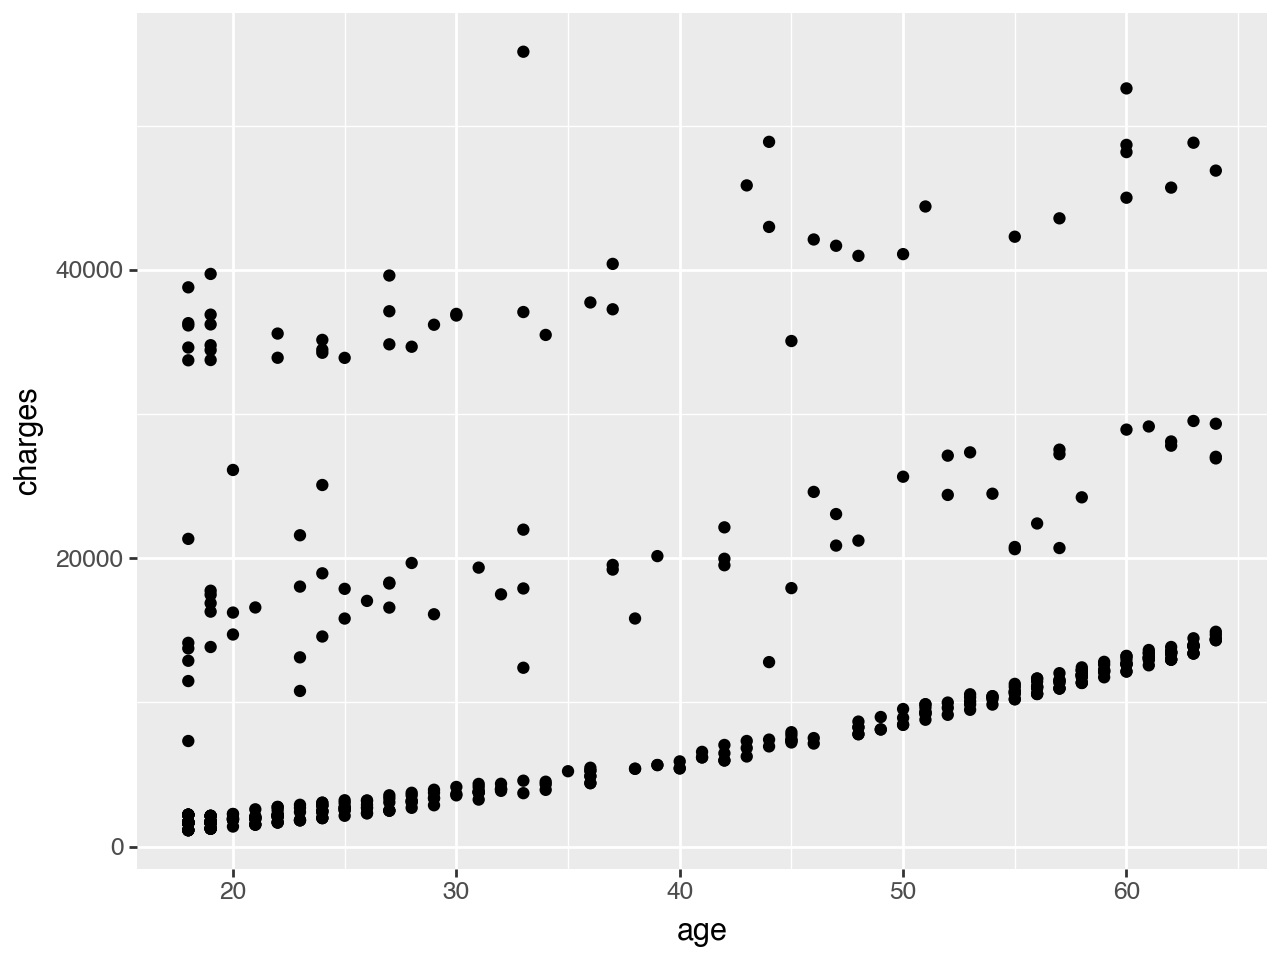

In [31]:
(p9.ggplot(InsuranceCost,p9.aes(x = "age", y = "charges"))+
 p9.geom_point()
)

- Plot 1 shows an overall positive correlation between age and charges. Notice there are three sections in the graph showing there are other factors interacting.

- plot 2

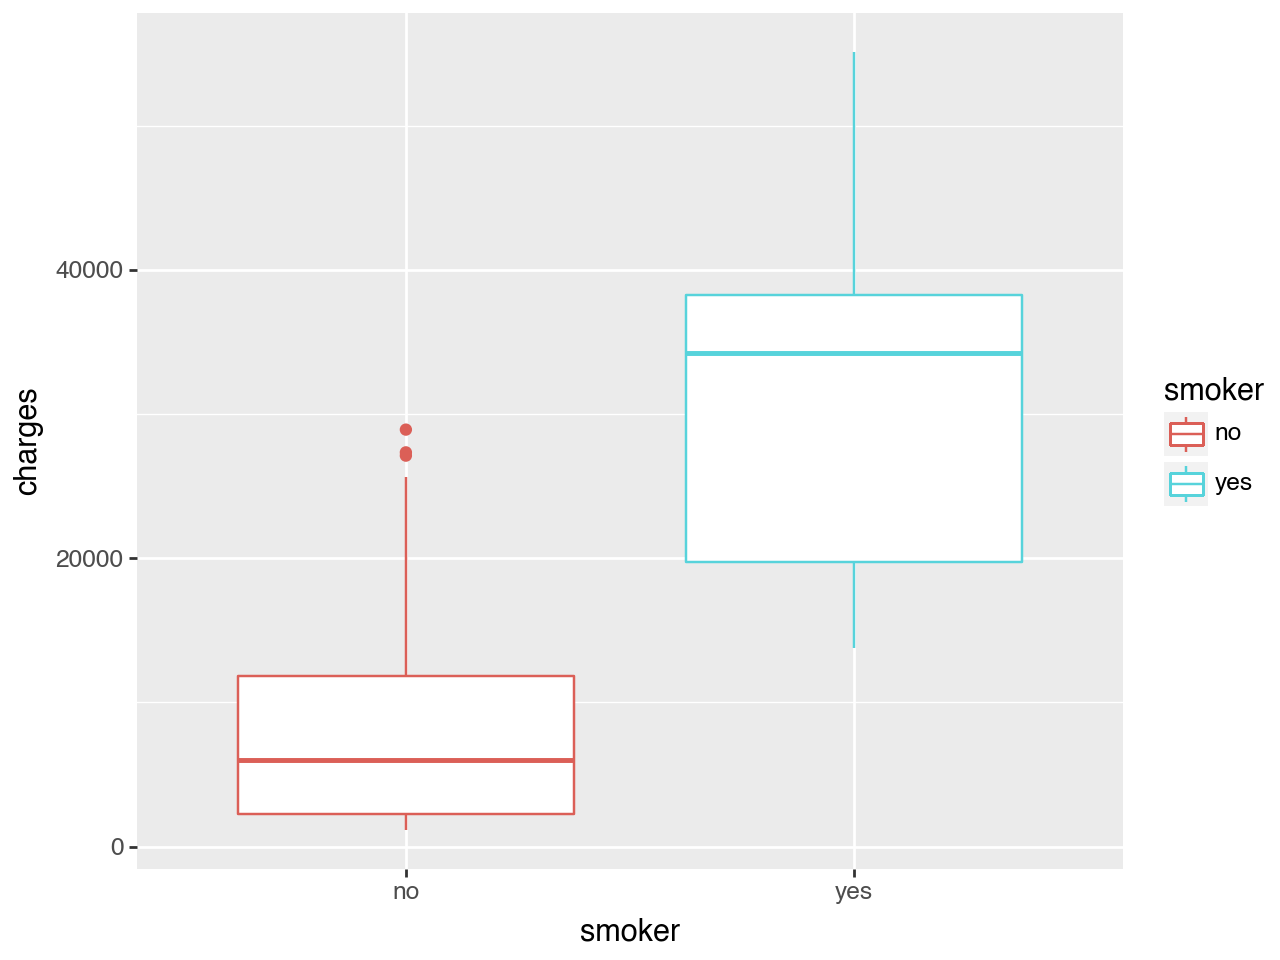

In [32]:
(p9.ggplot(InsuranceCost,p9.aes(x = "smoker",y = "charges", color = "smoker"))+
 p9.geom_boxplot()
 )

- Plot 2 shows there is a clear difference assocated between smokers and non smokers

#### plot 3

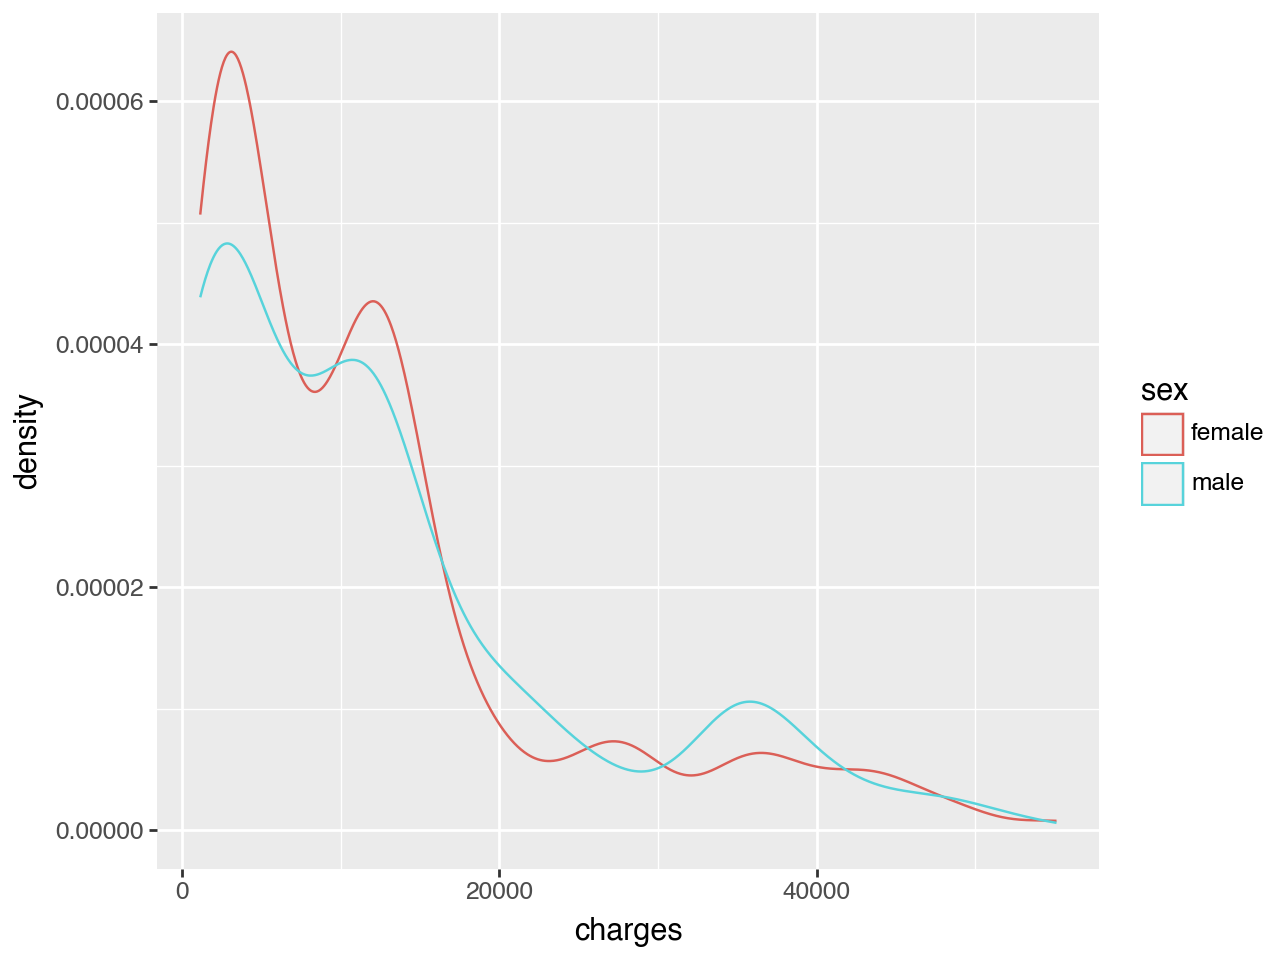

In [33]:
(p9.ggplot(InsuranceCost, p9.aes(x = "charges", color = "sex")) +
p9.geom_density()
)

- Plot 3 shows the overall trend of charges between males and females is similar, but females have a bigger share at lower charges.

## Part Two: Simple Linear Models

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [35]:
from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score

- Split X and y

In [36]:
X = InsuranceCost.drop("charges", axis = 1)
y = InsuranceCost["charges"]

- Split test and train sets

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### 1. Construct a simple linear model to predict the insurance charges from the beneficiary’s age.

- model 1charges = beta1 + beta2 * age

In [38]:
ct1 = ColumnTransformer(
  [
     ("keep", FunctionTransformer(None),["age"])
  ],
  remainder = "drop"
)
model_1 = Pipeline(
  [
    ("column_transformer", ct1),
    ("linear_regression", LinearRegression())
  ]
)

- standard coef

In [39]:
model_1_fitted = model_1.fit(X_train, y_train)
train_pred1 = model_1_fitted.predict(X_train)
test_pred1 = model_1_fitted.predict(X_test)
coef1 = model_1_fitted.named_steps['linear_regression'].coef_
coef1

array([211.69155768])

- mean and std

In [40]:
#scaler1 = model_1.named_steps['column_transformer'].named_transformers_['standardize']
#mean1 = scaler1.mean_[0]
#std1 = scaler1.scale_[0]
#mean1, std1

- covert std back to normal

In [41]:
#original_coef1 = coef1 / std1
#original_coef1

- metrics

In [42]:
pd.options.display.float_format = '{:.2f}'.format
result1 = pd.DataFrame([{
        "model": "model 1",
        "num_of_features": ct1.fit_transform(X_train).shape[1],
        "train_mse": mean_squared_error(y_train, train_pred1),
        "test_mse": mean_squared_error(y_test, test_pred1),
        "r2_train": r2_score(y_train, train_pred1),
        "r2_test": r2_score(y_test, test_pred1),
        "rmse_train": root_mean_squared_error(y_train, train_pred1),
        "rmse_test": root_mean_squared_error(y_test, test_pred1)
  }])
result1

,model,num_of_features,train_mse,test_mse,r2_train,r2_test,rmse_train,rmse_test
0,model 1,1,128517983.23,121801716.16,0.08,0.14,11336.58,11036.38


- The result shows R square is only 0.08 and 0.14 meaning the model only explain around 10% of the data.
- The train mse and test mse values are relatively high (11336 and 11036 for every 16 years) suggesting that the model's predictions are not very accurate
- Model 1 is under fitting.  

### 2. Make a model that also incorporates the variable sex.



- model 2 charges = beta1 + beta2 * age + beta3 * male

In [43]:
ct2 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(drop="first",sparse_output = False), ["sex"]),
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)
model_2 = Pipeline(
  [
    ("column_transformer", ct2),
    ("linear_regression", LinearRegression())
  ]
)

In [44]:
model_2_fitted = model_2.fit(X_train, y_train)
train_pred2 = model_2_fitted.predict(X_train)
test_pred2 = model_2_fitted.predict(X_test)

- metrics

In [45]:
pd.options.display.float_format = '{:.2f}'.format
result2 = pd.DataFrame([{
        "model": "model 2",
        "num_of_features": ct2.fit_transform(X_train).shape[1],
        "train_mse": mean_squared_error(y_train, train_pred2),
        "test_mse": mean_squared_error(y_test, test_pred2),
        "r2_train": r2_score(y_train, train_pred2),
        "r2_test": r2_score(y_test, test_pred2),
        "rmse_train": root_mean_squared_error(y_train, train_pred2),
        "rmse_test": root_mean_squared_error(y_test, test_pred2)
  }])
result2

,model,num_of_features,train_mse,test_mse,r2_train,r2_test,rmse_train,rmse_test
0,model 2,2,127976726.49,123710493.46,0.09,0.13,11312.68,11122.52


### 3. Now make a model that does not include sex, but does include smoker. Report your results.

- model 3 charges **bold text**= beta1 + beta2 * age + beta3 * smoker

In [46]:
ct3 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(drop="first",sparse_output = False), ["smoker"]),
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)
model_3 = Pipeline(
  [
    ("column_transformer", ct3),
    ("linear_regression", LinearRegression())
  ]
)
model_3_fitted = model_3.fit(X_train, y_train)
train_pred3 = model_3_fitted.predict(X_train)
test_pred3 = model_3_fitted.predict(X_test)

- metrics

In [47]:
pd.options.display.float_format = '{:.2f}'.format
result3 = pd.DataFrame([{
        "model": "model 3",
        "num_of_features": ct3.fit_transform(X_train).shape[1],
        "train_mse": mean_squared_error(y_train, train_pred3),
        "test_mse": mean_squared_error(y_test, test_pred3),
        "r2_train": r2_score(y_train, train_pred3),
        "r2_test": r2_score(y_test, test_pred3),
        "rmse_train": root_mean_squared_error(y_train, train_pred3),
        "rmse_test": root_mean_squared_error(y_test, test_pred3)
  }])
result3

,model,num_of_features,train_mse,test_mse,r2_train,r2_test,rmse_train,rmse_test
0,model 3,2,35872567.01,27352787.78,0.74,0.81,5989.37,5229.99


### 4. Which model (Q2 or Q3) do you think better fits the data?

In [48]:
model_compare1 = pd.concat([result1, result2, result3], ignore_index=True)
model_compare1

,model,num_of_features,train_mse,test_mse,r2_train,r2_test,rmse_train,rmse_test
0,model 1,1,128517983.23,121801716.16,0.08,0.14,11336.58,11036.38
1,model 2,2,127976726.49,123710493.46,0.09,0.13,11312.68,11122.52
2,model 3,2,35872567.01,27352787.78,0.74,0.81,5989.37,5229.99


- Model 2 shows R square is only 0.09 and 0.13 meaning the model only explain around 10% of the data. The train mse and test mse values are relatively high (11312 and 11122 for every 16 years) suggesting that the model's predictions are not very accurate
- In model 3, R square, test MSE, and train MSE significantly increase. The result shows R square is only 0.74 and 0.81 meaning the model only explain around 75% of the data. The train mse and test mse values are relatively lower(5989 and 5229 for every 16 years) suggesting that the model's predictions are not very accurate
- Model 3 is so far the best


## Part Three: Multiple Linear Models

### 1. Fit a model that uses age and bmi as predictors.

- charges = beta1 + beta2 * age + beta3 * bmi

In [49]:
ct4 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age","bmi"])
  ],
  remainder = "drop"
)
model_4 = Pipeline(
  [
    ("column_transformer", ct4),
    ("linear_regression", LinearRegression())
  ]
)
model_4_fitted = model_4.fit(X_train, y_train)
train_pred4 = model_4_fitted.predict(X_train)
test_pred4 = model_4_fitted.predict(X_test)

- metrics

In [50]:
pd.options.display.float_format = '{:.2f}'.format
result4 = pd.DataFrame([{
        "model": "model 4",
        "num_of_features": ct4.fit_transform(X_train).shape[1],
        "train_mse": mean_squared_error(y_train, train_pred4),
        "test_mse": mean_squared_error(y_test, test_pred4),
        "r2_train": r2_score(y_train, train_pred4),
        "r2_test": r2_score(y_test, test_pred4),
        "rmse_train": root_mean_squared_error(y_train, train_pred4),
        "rmse_test": root_mean_squared_error(y_test, test_pred4)
  }])
model_compare2 = pd.concat([result1, result4], ignore_index=True)
model_compare2

,model,num_of_features,train_mse,test_mse,r2_train,r2_test,rmse_train,rmse_test
0,model 1,1,128517983.23,121801716.16,0.08,0.14,11336.58,11036.38
1,model 4,2,125962263.10,117716955.13,0.10,0.17,11223.29,10849.74


- Model 4 has a slightly higher R-squared value on both training and testing sets (0.10 training 0.17 testing), indicating that it explains a larger proportion of the variance in the data.
- Model 4 also has lower MSE and RMSE values on both training and testing sets (11223.29 training 10849.74 testing), indicating that it makes more accurate predictions.
- Therefore, Model 4 appears to be a better choice.

### 2. Fit a model that uses age and age^2 as predictors.

- charges = beta1 + beta2 * age + beta3 * age^2

In [51]:
ct5 = ColumnTransformer(
  [
    ("polynomial", PolynomialFeatures(degree = 2, include_bias=False), ["age"])
  ],
  remainder = "drop"
)

model_5 = Pipeline(
  [
    ("column_transformer", ct5),
    ("linear_regression", LinearRegression())
  ]
).set_output(transform = "pandas")
model_5_fitted = model_5.fit(X_train, y_train)
train_pred5 = model_5_fitted.predict(X_train)
test_pred5 = model_5_fitted.predict(X_test)
ct5.fit_transform(X_train)[0:1]

,polynomial__age,polynomial__age^2
3,31.00,961.00


- metrics

In [52]:
pd.options.display.float_format = '{:.2f}'.format
result5 = pd.DataFrame([{
        "model": "model 5",
        "num_of_features": ct5.fit_transform(X_train).shape[1],
        "train_mse": mean_squared_error(y_train, train_pred5),
        "test_mse": mean_squared_error(y_test, test_pred5),
        "r2_train": r2_score(y_train, train_pred5),
        "r2_test": r2_score(y_test, test_pred5),
        "rmse_train": root_mean_squared_error(y_train, train_pred5),
        "rmse_test": root_mean_squared_error(y_test, test_pred5)
  }])
model_compare2 = pd.concat([result1, result5], ignore_index=True)
model_compare2

,model,num_of_features,train_mse,test_mse,r2_train,r2_test,rmse_train,rmse_test
0,model 1,1,128517983.23,121801716.16,0.08,0.14,11336.58,11036.38
1,model 5,2,128494366.32,121747479.23,0.08,0.14,11335.54,11033.92


- Both models exhibit similar performance metrics. The R-squared values are low, indicating that the models explain a small portion of the variance in the data. The RMSE values are also relatively high, suggesting that the models' predictions are not very accurate.

### 3. Fit a model of degree 4

In [53]:
ct6 = ColumnTransformer(
  [
    ("polynomial", PolynomialFeatures(degree = 4, include_bias=False), ["age"])
  ],
  remainder = "drop"
)

model_6 = Pipeline(
  [
    ("column_transformer", ct6),
    ("linear_regression", LinearRegression())
  ]
).set_output(transform = "pandas")
model_6_fitted = model_6.fit(X_train, y_train)
train_pred6 = model_6_fitted.predict(X_train)
test_pred6 = model_6_fitted.predict(X_test)
ct6.fit_transform(X_train)[0:1]

,polynomial__age,polynomial__age^2,polynomial__age^3,polynomial__age^4
3,31.00,961.00,29791.00,923521.00


In [54]:
pd.options.display.float_format = '{:.2f}'.format
result6 = pd.DataFrame([{
        "model": "model 6",
        "num_of_features": ct6.fit_transform(X_train).shape[1],
        "train_mse": mean_squared_error(y_train, train_pred6),
        "test_mse": mean_squared_error(y_test, test_pred6),
        "r2_train": r2_score(y_train, train_pred6),
        "r2_test": r2_score(y_test, test_pred6),
        "rmse_train": root_mean_squared_error(y_train, train_pred6),
        "rmse_test": root_mean_squared_error(y_test, test_pred6)
  }])
model_compare3 = pd.concat([result1, result6], ignore_index=True)
model_compare3

,model,num_of_features,train_mse,test_mse,r2_train,r2_test,rmse_train,rmse_test
0,model 1,1,128517983.23,121801716.16,0.08,0.14,11336.58,11036.38
1,model 6,4,127965817.13,119880218.41,0.09,0.15,11312.20,10948.98


### 4. Fit a model of degree 12

In [55]:
ct7 = ColumnTransformer(
  [
    ("polynomial", PolynomialFeatures(degree = 12, include_bias=False), ["age"])
  ],
  remainder = "drop"
)

model_7 = Pipeline(
  [
    ("column_transformer", ct7),
    ("linear_regression", LinearRegression())
  ]
).set_output(transform = "pandas")
model_7_fitted = model_7.fit(X_train, y_train)
train_pred7 = model_7_fitted.predict(X_train)
test_pred7 = model_7_fitted.predict(X_test)
ct7.fit_transform(X_train)[0:1]

,polynomial__age,polynomial__age^2,polynomial__age^3,polynomial__age^4,polynomial__age^5,polynomial__age^6,polynomial__age^7,polynomial__age^8,polynomial__age^9,polynomial__age^10,polynomial__age^11,polynomial__age^12
3,31.00,961.00,29791.00,923521.00,28629151.00,887503681.00,27512614111.00,852891037441.00,26439622160671.00,819628286980801.00,25408476896404832.00,787662783788549760.00


In [56]:
pd.options.display.float_format = '{:.2f}'.format
result7 = pd.DataFrame([{
        "model": "model 7",
        "num_of_features": ct7.fit_transform(X_train).shape[1],
        "train_mse": mean_squared_error(y_train, train_pred7),
        "test_mse": mean_squared_error(y_test, test_pred7),
        "r2_train": r2_score(y_train, train_pred7),
        "r2_test": r2_score(y_test, test_pred7),
        "rmse_train": root_mean_squared_error(y_train, train_pred7),
        "rmse_test": root_mean_squared_error(y_test, test_pred7)
  }])
model_compare4 = pd.concat([result1, result7], ignore_index=True)
model_compare4

,model,num_of_features,train_mse,test_mse,r2_train,r2_test,rmse_train,rmse_test
0,model 1,1,128517983.23,121801716.16,0.08,0.14,11336.58,11036.38
1,model 7,12,127641233.64,122496058.08,0.09,0.13,11297.84,11067.79


### 5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

In [57]:
model_compare5 = pd.concat([result1, result5, result6, result7], ignore_index=True)
model_compare5

,model,num_of_features,train_mse,test_mse,r2_train,r2_test,rmse_train,rmse_test
0,model 1,1,128517983.23,121801716.16,0.08,0.14,11336.58,11036.38
1,model 5,2,128494366.32,121747479.23,0.08,0.14,11335.54,11033.92
2,model 6,4,127965817.13,119880218.41,0.09,0.15,11312.20,10948.98
3,model 7,12,127641233.64,122496058.08,0.09,0.13,11297.84,11067.79


- Model 6 with degree 4 seems to be the "best" with highest R2. MSE is the second lowest, but Model six is still relatively inaccurate with low R2.

### 6. Plot Model 7 with degree 12

In [58]:
import plotnine as p9

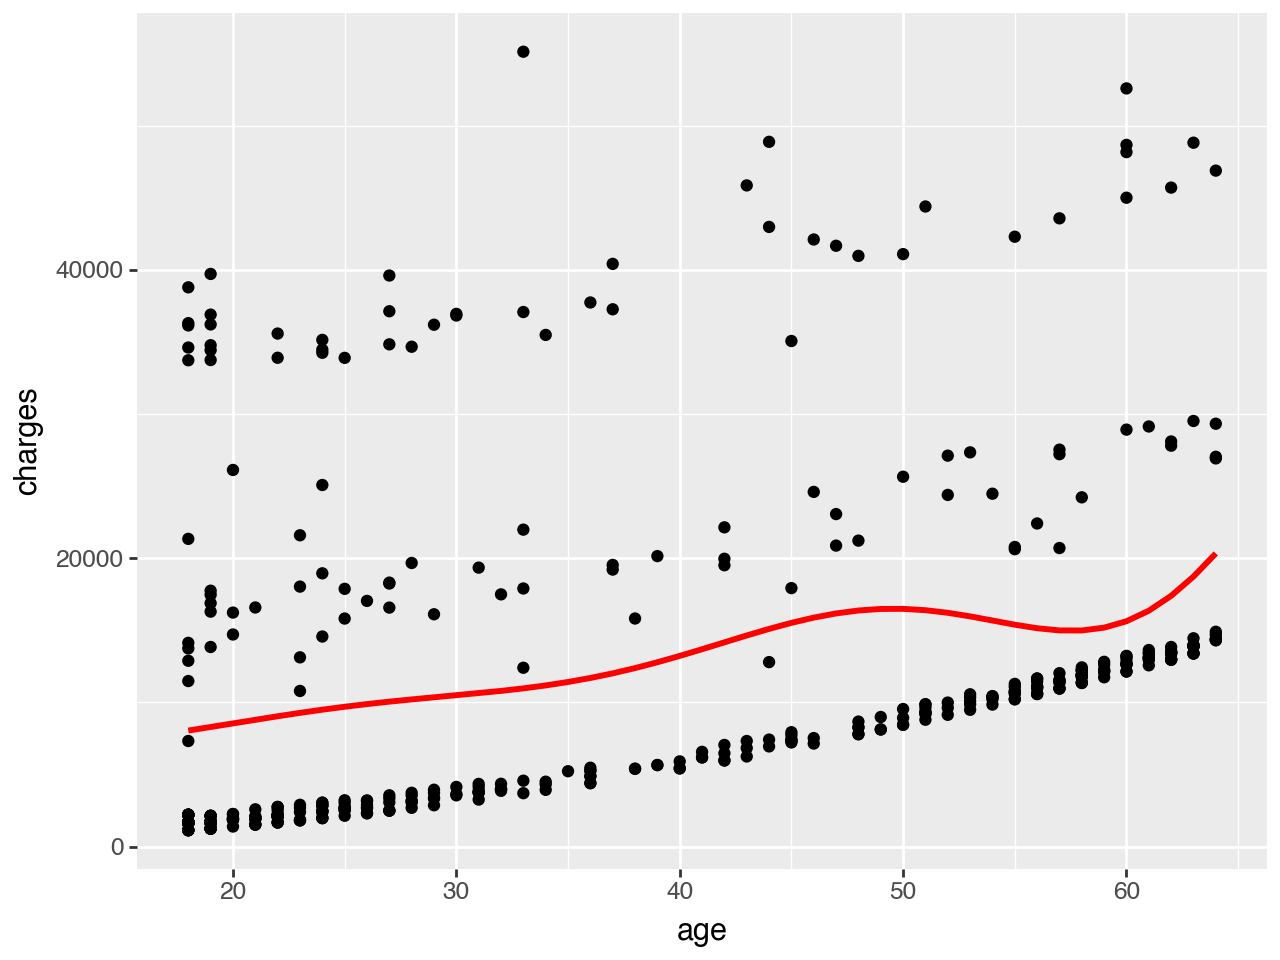

In [59]:
InsuranceCost['predicted_charge'] = model_7_fitted.predict(X)
(
p9.ggplot(InsuranceCost, p9.aes(x='age', y='charges'))+
p9.geom_point() +
p9.geom_line(p9.aes(y='predicted_charge'), color='red', size=1.2)
)

## Part Four: New data

In [60]:
InsuranceCost2 = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")
InsuranceCost2.head()

,age,sex,bmi,smoker,region,charges
0,23,male,34.40,no,southwest,1826.84
1,56,male,40.30,no,southwest,10602.39
2,18,male,34.10,no,southeast,1137.01
3,63,female,23.09,no,northeast,14451.84
4,63,male,28.31,no,northwest,13770.10


In [61]:
X2 = InsuranceCost2.drop("charges", axis = 1)
y2 = InsuranceCost2["charges"]

### 1. Only age as a predictor.

In [62]:
model_1_fitted = model_1.fit(X, y)
train_pred8 = model_1_fitted.predict(X)
test_pred8 = model_1_fitted.predict(X2)
pd.options.display.float_format = '{:.2f}'.format
result8 = pd.DataFrame([{
        "model": "model 1",
        "num_of_features": ct1.fit_transform(X).shape[1],
        "train_mse": mean_squared_error(y, train_pred8),
        "test_mse": mean_squared_error(y2, test_pred8),
        "r2_train": r2_score(y, train_pred8),
        "r2_test": r2_score(y2, test_pred8),
        "rmse_train": root_mean_squared_error(y, train_pred8),
        "rmse_test": root_mean_squared_error(y2, test_pred8)
  }])
result8

,model,num_of_features,train_mse,test_mse,r2_train,r2_test,rmse_train,rmse_test
0,model 1,1,126739267.91,136077136.50,0.10,0.12,11257.85,11665.21


### 2. age and bmi as a predictor

In [63]:
model_9_fitted = model_4.fit(X, y)
train_pred9 = model_4_fitted.predict(X)
test_pred9 = model_4_fitted.predict(X2)
pd.options.display.float_format = '{:.2f}'.format
result9 = pd.DataFrame([{
        "model": "model 4",
        "num_of_features": ct4.fit_transform(X).shape[1],
        "train_mse": mean_squared_error(y, train_pred9),
        "test_mse": mean_squared_error(y2, test_pred9),
        "r2_train": r2_score(y, train_pred9),
        "r2_test": r2_score(y2, test_pred9),
        "rmse_train": root_mean_squared_error(y, train_pred9),
        "rmse_test": root_mean_squared_error(y2, test_pred9)
  }])
result9

,model,num_of_features,train_mse,test_mse,r2_train,r2_test,rmse_train,rmse_test
0,model 4,2,123792439.58,132636406.11,0.12,0.14,11126.21,11516.79


### 3. age, bmi, and smoker as predictors (no interaction terms)

In [64]:
ct10 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(drop="first",sparse_output = False), ["smoker"]),
    ("keep", FunctionTransformer(None), ["age","bmi"])
  ],
  remainder = "drop"
)
model_10 = Pipeline(
  [
    ("column_transformer", ct10),
    ("linear_regression", LinearRegression())
  ]
).set_output(transform = "pandas")
model_10_fitted = model_10.fit(X, y)
train_pred10 = model_10_fitted.predict(X)
test_pred10 = model_10_fitted.predict(X2)
pd.options.display.float_format = '{:.2f}'.format
result10 = pd.DataFrame([{
        "model": "model 10",
        "num_of_features": ct10.fit_transform(X).shape[1],
        "train_mse": mean_squared_error(y, train_pred10),
        "test_mse": mean_squared_error(y2, test_pred10),
        "r2_train": r2_score(y, train_pred10),
        "r2_test": r2_score(y2, test_pred10),
        "rmse_train": root_mean_squared_error(y, train_pred10),
        "rmse_test": root_mean_squared_error(y2, test_pred10)
  }])
result10

,model,num_of_features,train_mse,test_mse,r2_train,r2_test,rmse_train,rmse_test
0,model 10,3,30812111.94,35377541.24,0.78,0.77,5550.87,5947.90


In [65]:
ct10.fit_transform(X)

,dummify__smoker_yes,keep__age,keep__bmi
0,1.00,19,27.90
1,0.00,33,22.70
2,0.00,32,28.88
3,0.00,31,25.74
4,0.00,60,25.84
...,...,...,...
426,0.00,23,33.40
427,0.00,18,31.92
428,0.00,18,36.85
429,0.00,21,25.80


### 4. ~ (age + bmi):smoker

In [66]:
ct11 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(drop="first",sparse_output = False), ["smoker"]),
  ],remainder = "passthrough"
).set_output(transform = "pandas")

ct12 = ColumnTransformer(
  [
    ("interaction1", PolynomialFeatures(interaction_only = True, include_bias=False), ["remainder__age","dummify__smoker_yes"]),
    ("interaction2", PolynomialFeatures(interaction_only = True, include_bias=False), ["remainder__bmi","dummify__smoker_yes"])
  ],
  remainder = "drop"
).set_output(transform = "pandas")
# exclude the original age, bmi, and dummy terms
ct13 = ColumnTransformer(
  [
    ("keep", FunctionTransformer(None),["interaction1__remainder__age dummify__smoker_yes",
                                        "interaction2__remainder__bmi dummify__smoker_yes"])
  ],
  remainder = "drop"
).set_output(transform = "pandas")
model_11 = Pipeline(
  [
    ("dummify",ct11),
    ("interaction", ct12),
    ("keep", ct13),
    ("linear_regression", LinearRegression())
  ]
).set_output(transform = "pandas")

num_of_features_after_ct13 = model_11.named_steps["keep"].fit_transform(model_11.named_steps["interaction"].fit_transform(model_11.named_steps["dummify"].fit_transform(X))).shape[1]
model_11_fitted = model_11.fit(X, y)
train_pred11 = model_11_fitted.predict(X)
test_pred11 = model_11_fitted.predict(X2)
result11 = pd.DataFrame([{
        "model": "model 11",
        "num_of_features": num_of_features_after_ct13,
        "train_mse": mean_squared_error(y, train_pred11),
        "test_mse": mean_squared_error(y2, test_pred11),
        "r2_train": r2_score(y, train_pred11),
        "r2_test": r2_score(y2, test_pred11),
        "rmse_train": root_mean_squared_error(y, train_pred11),
        "rmse_test": root_mean_squared_error(y2, test_pred11)
}])
result11

,model,num_of_features,train_mse,test_mse,r2_train,r2_test,rmse_train,rmse_test
0,model 11,2,38656340.46,47626025.36,0.73,0.69,6217.42,6901.16


### 5. ~ (age + bmi)*smoker

In [67]:
model_12 = Pipeline(
  [
    ("dummify",ct11),
    ("interaction", ct12),
    ("linear_regression", LinearRegression())
  ]
).set_output(transform = "pandas")

num_of_features_after_ct12 = model_12.named_steps["interaction"].fit_transform(model_12.named_steps["dummify"].transform(X)).shape[1]
model_12_fitted = model_12.fit(X, y)
train_pred12 = model_11_fitted.predict(X)
test_pred12 = model_11_fitted.predict(X2)
result12 = pd.DataFrame([{
        "model": "model 12",
        "num_of_features": num_of_features_after_ct12,
        "train_mse": mean_squared_error(y, train_pred11),
        "test_mse": mean_squared_error(y2, test_pred11),
        "r2_train": r2_score(y, train_pred11),
        "r2_test": r2_score(y2, test_pred11),
        "rmse_train": root_mean_squared_error(y, train_pred11),
        "rmse_test": root_mean_squared_error(y2, test_pred11)
}])
result12

,model,num_of_features,train_mse,test_mse,r2_train,r2_test,rmse_train,rmse_test
0,model 12,6,38656340.46,47626025.36,0.73,0.69,6217.42,6901.16


### 6. Final comparison

In [68]:
model_compare6 = pd.concat([result8, result9, result10, result11, result12], ignore_index=True)
model_compare6

,model,num_of_features,train_mse,test_mse,r2_train,r2_test,rmse_train,rmse_test
0,model 1,1,126739267.91,136077136.50,0.10,0.12,11257.85,11665.21
1,model 4,2,123792439.58,132636406.11,0.12,0.14,11126.21,11516.79
2,model 10,3,30812111.94,35377541.24,0.78,0.77,5550.87,5947.90
3,model 11,2,38656340.46,47626025.36,0.73,0.69,6217.42,6901.16
4,model 12,6,38656340.46,47626025.36,0.73,0.69,6217.42,6901.16


- Based on the above results, Model 10 is the best fitted model with the highest R 2. Notice Model 4 have higher mse because its x variables was standardlized. 

## Part Five: Full Exploration

### 1. Model with all vaiables

In [69]:
ct14 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(drop="first",sparse_output = False), ["smoker","sex","region"]),
    ("standardize", StandardScaler(), ["age","bmi"])
  ],
  remainder = "drop"
)
model_14 = Pipeline(
  [
    ("column_transformer", ct14),
    ("linear_regression", LinearRegression())
  ]
).set_output(transform = "pandas")
model_14_fitted = model_14.fit(X, y)
train_pred14 = model_14_fitted.predict(X)
test_pred14 = model_14_fitted.predict(X2)
pd.options.display.float_format = '{:.2f}'.format
result14 = pd.DataFrame([{
        "model": "model 14",
        "num_of_features": ct14.fit_transform(X).shape[1],
        "train_mse": mean_squared_error(y, train_pred14),
        "test_mse": mean_squared_error(y2, test_pred14),
        "r2_train": r2_score(y, train_pred14),
        "r2_test": r2_score(y2, test_pred14),
        "rmse_train": root_mean_squared_error(y, train_pred14),
        "rmse_test": root_mean_squared_error(y2, test_pred14)
  }])
result14

,model,num_of_features,train_mse,test_mse,r2_train,r2_test,rmse_train,rmse_test
0,model 14,7,30713302.11,36021379.54,0.78,0.77,5541.96,6001.78


### 2. Model 10 is the best fit based on metrics shown

In [70]:
def residualplot(model,X,y,X2,y2):
  model_fitted = model.fit(X, y)
  y2_pred = model_fitted.predict(X2)
  residuals = y2 - y2_pred
  df = pd.DataFrame({'y': y2, 'pred': y2_pred, 'residuals': residuals})
  plot = (p9.ggplot(df,p9.aes(x='pred', y='residuals')) +
    p9.geom_point() + \
    p9.geom_smooth(method='lm', se=False, color = "red") +
    p9.labs(title='Residual vs Fitted', x='Predicted Values', y='Residuals')+
    p9.scale_x_log10(breaks=[1000, 5000, 20000, 40000])
  )
  print(df[:5])
  return plot

         y     pred  residuals
0  1826.84  4863.87   -3037.03
1 10602.39 14467.46   -3865.08
2  1137.01  3575.87   -2438.85
3 14451.84 11309.62    3142.22
4 13770.10 12779.51     990.59


/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


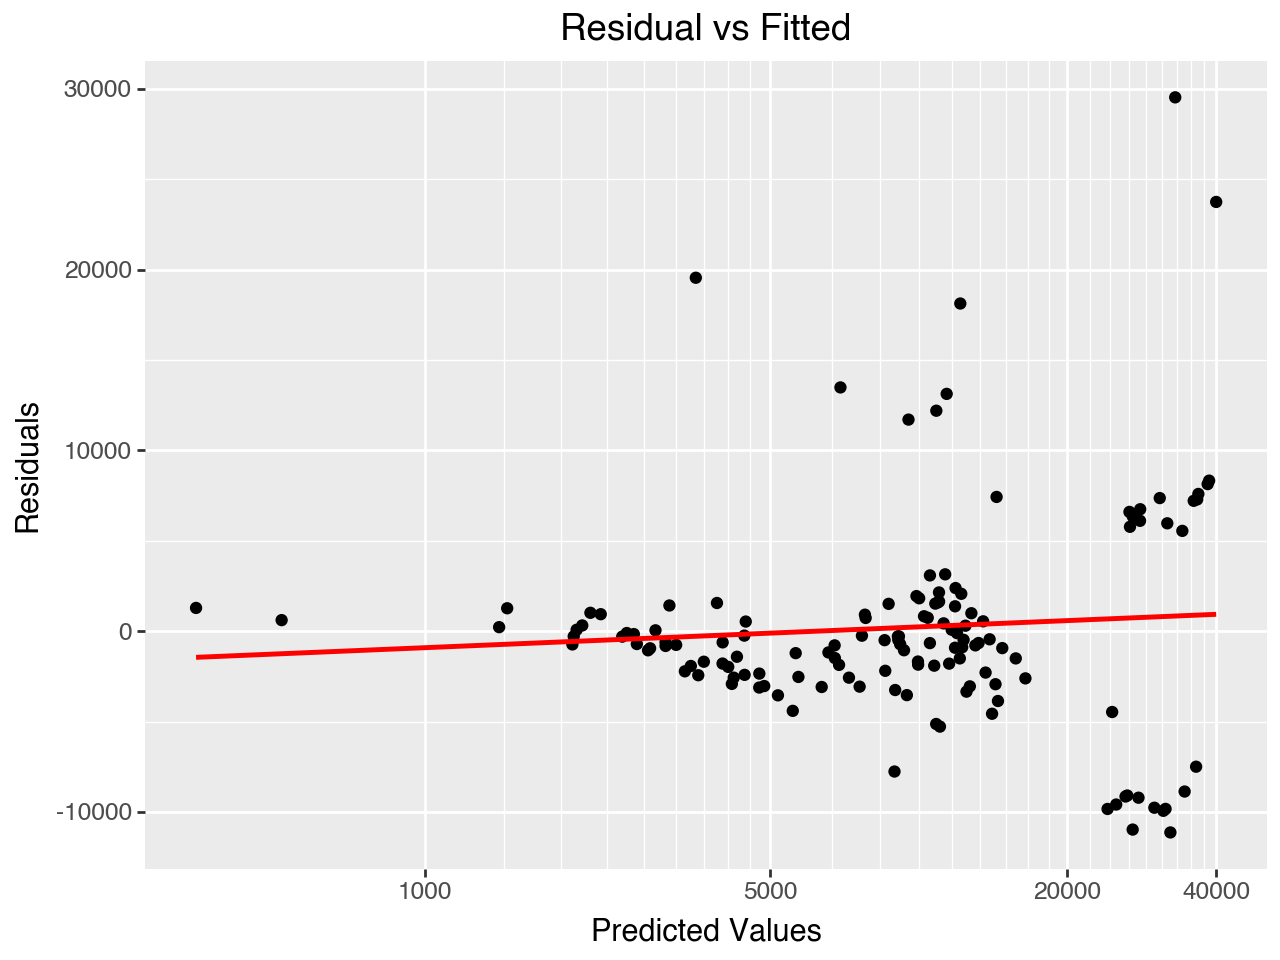

In [71]:
residualplot(model_10,X,y,X2,y2)